# Data Preprocessing and Regression #

### Question 1 ###

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('hepatitis_csv.csv')
print(df)

     age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0     30    male   False       False   False   False    False     False   
1     50  female   False       False    True   False    False     False   
2     78  female    True       False    True   False    False      True   
3     31  female     NaN        True   False   False    False      True   
4     34  female    True       False   False   False    False      True   
..   ...     ...     ...         ...     ...     ...      ...       ...   
150   46  female    True       False    True    True     True      True   
151   44  female    True       False    True   False    False      True   
152   61  female   False       False    True    True    False     False   
153   53    male   False       False    True   False    False      True   
154   43  female    True       False    True   False    False      True   

    liver_firm spleen_palpable spiders ascites varices  bilirubin  \
0        False           False

In [4]:
columns_to_drop=['spiders']
data = df.drop(columns=columns_to_drop, axis=1)

In [5]:
data = data.dropna()

In [6]:
data=pd.get_dummies(data , drop_first=True)

In [9]:
for column in data.columns:
    if data[column].isnull().sum()>0:
        data[column].fillna(data[column].mean(), inplace=True)

In [10]:
data_numpy=data.to_numpy()

In [12]:
np.random.seed(42)
np.random.shuffle(data_numpy)
X=data_numpy[:,:-1]
y=data_numpy[:,-1]
train_size=int(0.8 * len(data_numpy))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((64, 18), (16, 18), (64,), (16,))

### Question 2 ###

In [33]:
data=pd.read_excel('data.xlsx')
print(df)

   Study_time  Score
0           1      2
1           2      4
2           3      6
3           4      8
4           5     10
5           6     12
6           7     14
7           8     16
8           9     18
9          10     20


In [34]:
X = data['Study_time'].values
y = data['Score'].values

In [35]:
def mean(values):
    return sum(values)/len(values)

In [37]:
def pedhazurs_formula(X,y):
    x_mean=mean(X)
    y_mean=mean(y)

    numerator=sum((X-x_mean)*(y-y_mean))
    denominator=sum((X-x_mean) ** 2)

    B1=numerator/denominator

    B0 = y_mean-(B1*x_mean)

    return B0,B1

B0_pedhazur,B1_pedhazur=pedhazurs_formula(X,y)

def predict(X,B0,B1):
    return B0+(B1*X)

y_pred_pedhazur=predict(X,B0_pedhazur,B1_pedhazur)

def rmse(y_true,y_pred):
    return np.sqrt(np.mean((y_true-y_pred) ** 2))

rmse_pedhazur = rmse(y,y_pred_pedhazur)

In [40]:
def calculus_method(X, y):
    n = len(X)
    # Formula for B1 (slope)
    numerator = np.sum((X * y)) - n * np.mean(X) * np.mean(y)
    denominator = np.sum(X ** 2) - n * np.mean(X) ** 2
    B1 = numerator / denominator
    # Formula for B0 (intercept)
    B0 = np.mean(y) - B1 * np.mean(X)
    return B0, B1

# Get the coefficients using the calculus method
B0_calculus, B1_calculus = calculus_method(X, y)

# Define the predict function
def predict(X, B0, B1):
    return B0 + B1 * X  # Use X (not x)

# Predict y values based on the model
y_pred_calculus = predict(X, B0_calculus, B1_calculus)

# Define the RMSE function to calculate error
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate RMSE for the calculus method predictions
rmse_calculus = rmse(y, y_pred_calculus)


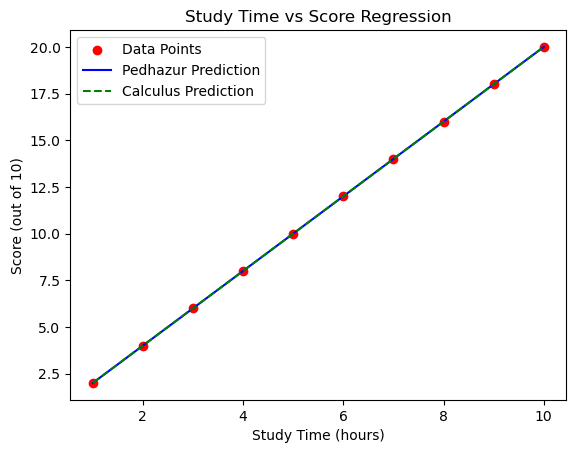

In [41]:
plt.scatter(X, y, color='red', label='Data Points')  # Red points for actual data
plt.plot(X, y_pred_pedhazur, color='blue', label='Pedhazur Prediction')  # Blue line for Pedhazur prediction
plt.plot(X, y_pred_calculus, color='green', label='Calculus Prediction', linestyle='--')  # Green dashed line for Calculus prediction
plt.xlabel('Study Time (hours)')
plt.ylabel('Score (out of 10)')
plt.legend()
plt.title('Study Time vs Score Regression')
plt.show()

In [42]:
study_time = 10
predicted_score_pedhazur = predict(study_time, B0_pedhazur, B1_pedhazur)
predicted_score_calculus = predict(study_time, B0_calculus, B1_calculus)

In [43]:
print(f"Pedhazur Formula Coefficients: B0 = {B0_pedhazur}, B1 = {B1_pedhazur}")
print(f"Calculus Method Coefficients: B0 = {B0_calculus}, B1 = {B1_calculus}")
print(f"RMSE (Pedhazur): {rmse_pedhazur}")
print(f"RMSE (Calculus): {rmse_calculus}")
print(f"Predicted Score for 10 hours (Pedhazur): {predicted_score_pedhazur}")
print(f"Predicted Score for 10 hours (Calculus): {predicted_score_calculus}")

Pedhazur Formula Coefficients: B0 = 0.0, B1 = 2.0
Calculus Method Coefficients: B0 = 0.0, B1 = 2.0
RMSE (Pedhazur): 0.0
RMSE (Calculus): 0.0
Predicted Score for 10 hours (Pedhazur): 20.0
Predicted Score for 10 hours (Calculus): 20.0
